<a href="https://colab.research.google.com/github/EliPinkus/CS11-C/blob/master/ec122set1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

#2.10

## 2.10.A

We can write CAPM as $y=\beta_1+\beta_2 x + \epsilon$ with $y=r_j-r_f$ and $x=r_m-r_f$.
This first with equation 2.1 in the book since we have a single explantory variable (returns of market portfolio over risk free rate).

## 2.10.B

In [0]:
capm = pd.read_csv('http://www.principlesofeconometrics.com/poe4/data/dat/capm4.dat',
            header=None, sep='\s\s+', engine='python')
capm.columns = ['date', 'Disney', 'General Electric', 'GM', 'IBM', 'Microsoft', 'EXXON', 'mkt', 'rf']
stocks = [ 'Disney', 'General Electric', 'GM', 'IBM', 'Microsoft', 'EXXON', 'mkt']

In [0]:
for stock in stocks:
  capm[stock + '_over_rf'] = capm[stock] - capm['rf']

In [0]:
X = np.array(capm['mkt_over_rf']).reshape(-1,1)
for stock in stocks:
  y = np.array(capm[stock + '_over_rf'])
  reg = LinearRegression()
  reg.fit(X, y = y)
  beta1, beta2 = reg.intercept_, reg.coef_[0]
  lin_reg = lambda x: x * beta2 + beta1
  print (f'{stock}: alpha  {beta1},  beta {beta2}')

Disney: alpha  -0.0011494089976508467,  beta 0.8978381069257936
General Electric: alpha  -0.0011669334592206843,  beta 0.8992599289746637
GM: alpha  -0.01155001931534108,  beta 1.2614107002577049
IBM: alpha  0.005851259129719721,  beta 1.1882083505684915
Microsoft: alpha  0.00609752005264962,  beta 1.3189468140536933
EXXON: alpha  0.007880144818470174,  beta 0.41396895102405395
mkt: alpha  2.710505431213761e-20,  beta 1.0000000000000002


We notice that GM, IBM, and microsoft can be consider aggressive while exxon GM and Disney are more defensive.

## 2.10.C

The alpha values are rather close to 0 which is consistent with the thoery.

We can rerun the regression assuming intercept is 0:

## 2.10.D

In [0]:
X = np.array(capm['mkt_over_rf']).reshape(-1,1)
for stock in stocks:
  y = np.array(capm[stock + '_over_rf'])
  reg = LinearRegression(fit_intercept = False)
  reg.fit(X, y = y)
  beta1, beta2 = reg.intercept_, reg.coef_[0]
  lin_reg = lambda x: x * beta2 + beta1
  print (f'{stock}: alpha  {beta1},  beta {beta2}')

Disney: alpha  0.0,  beta 0.8979192926662851
General Electric: alpha  0.0,  beta 0.899342352513356
GM: alpha  0.0,  beta 1.2622265080969761
IBM: alpha  0.0,  beta 1.1877950609507586
Microsoft: alpha  0.0,  beta 1.318516130387868
EXXON: alpha  0.0,  beta 0.4134123559446872
mkt: alpha  0.0,  beta 0.9999999999999996


The Values change marginally

#2.15

In [0]:
df = pd.read_csv('http://www.principlesofeconometrics.com/poe4/data/dat/cps4_small.dat',
            header=None, sep='\s\s+', engine='python')

In [0]:
#df = df.iloc[:,0:2]
df.columns = ['wage', 'edu', 'exper', 'hrswk','married', 'female', 'metro', 'midwest', 'south', 'west', 'black', 'asian']

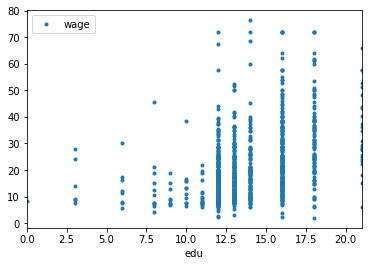

In [0]:
df.plot(y = 'wage', x = 'edu', style = '.')


## 2.15.A

In [0]:
df.describe()[['wage','edu']]

,wage,edu
count,1000.000000,1000.000000
mean,20.615660,13.799000
std,12.834725,2.711079
min,1.970000,0.000000
25%,11.250000,12.000000
50%,17.300000,13.000000
75%,25.630000,16.000000
max,76.390000,21.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77924fe438>,
      dtype=object)

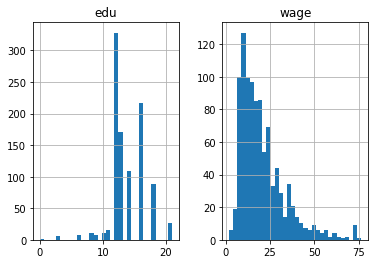

In [0]:
df.hist(['edu', 'wage'], bins = 32)

In [0]:
df.groupby('edu').count().loc[0]

wage       1
exper      1
hrswk      1
married    1
female     1
metro      1
midwest    1
south      1
west       1
black      1
asian      1
Name: 0, dtype: int64

There's a clear skew to both distrabutions (high skew for edu, low for wage). 
We note that our wage data ranges from ~2k to ~76k so it is not considering the upperclass or individuals w/o wages. ALso worth noting that the dataset includes people w/ no years of formal education (a single individual actually). The bulk of the dataset describes people with between 12 and 16 years of schooling which corresponds to completing high school and some college. The median represents and individual with little to no college (if kindergarden is a thing).

## 2.15.C

In [0]:
X = np.array(df.edu)
X = [[x] for x in X]
y = np.array(df.wage)
reg = LinearRegression()
reg.fit(X, y = y)
beta1, beta2 = reg.intercept_, reg.coef_[0]
lin_reg = lambda x: x * beta2 + beta1
beta1, beta2

(-6.7103284204952445, 1.9802875875422308)

In [0]:
reg.score(X, y)

0.17497167061422325

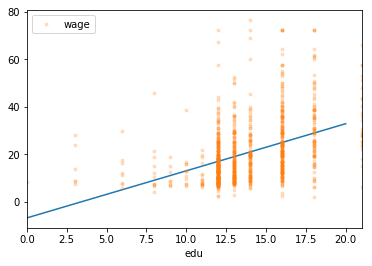

In [0]:
fig = plt.figure()
ax = plt.axes()
X = np.linspace(0,20,10000)
y = reg.predict(X.reshape(-1,1))
ax.plot(X, y)
df.plot(y = 'wage', x = 'edu', style = '.', ax = ax, alpha = 0.2)

The linear model has a slope of ~2 and an R^2 of 0.17. This is a crude indicator that wages are at least correlated with schooling years. The y intercept is negative which would seem to imply that those with no education have negative wages. This could be the result of the fact that the dataset is most representative in the 12-16 year range which makes the low end up of the spectrum less represented in the regression analysis. One could also conceive of an intuitive interperatation of negative wages as perhaps an individual that receives more in wellfare or other benefits than they earn(i.e. a net ).

In [0]:
df['error'] = abs(df.wage - reg.predict(np.array(df.edu).reshape(-1,1)))
df['error_sq'] = df.error ** 2

In [0]:
df.corr()[['wage', 'edu', 'error', 'error_sq']]

,wage,edu,error,error_sq
wage,1.000000,0.418296,0.586597,0.650876
edu,0.418296,1.000000,0.192711,0.139268
exper,0.089090,-0.127616,0.047725,0.066702
hrswk,0.154643,0.105543,-0.024556,0.006127
married,0.136502,0.084356,0.043608,0.050419
female,-0.115730,0.130185,0.034990,-0.006605
metro,0.158352,0.109382,0.072484,0.081569
midwest,-0.098856,-0.020531,-0.047740,-0.058765
south,0.002135,0.024654,0.022724,0.014681
west,0.057384,-0.043862,0.048916,0.053628


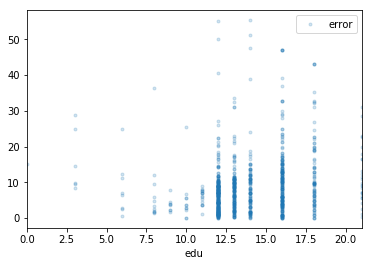

In [0]:
df.plot(x = 'edu', y = 'error', style = '.', alpha = .2)

By graph inspection and correlation analysis, we can see that there is for sure a nonnegligable correlation between education and residuals.

If the assumptions were valid there should not be correlations between our variable and our error. 

## 2.15.D

In [0]:
males = df[df.female < 1]
females = df[df.female == 1]
blacks = df[df.black == 1]
whites = df[~((df.black > 0) | (df.asian > 0))]

In [0]:
def reg (df):
  X = np.array(df.edu)
  X = [[x] for x in X]
  y = np.array(df.wage)
  reg = LinearRegression()
  reg.fit(X, y = y)
  beta1, beta2 = reg.intercept_, reg.coef_[0]
  return beta1, beta2, reg.score(X,y)

I'll print out $\beta_1,\beta_2, R^2$ for each group

In [0]:
# males
reg(males)

(-3.0544872230024644, 1.8753002741775189, 0.18080314394614128)

In [0]:
# females
reg(females)

(-14.16804608894212, 2.3575190108290345, 0.21066912568129081)

In [0]:
# blacks
reg(blacks)

(-15.085926490796258, 2.4490577291877447, 0.20983771399538442)

In [0]:
# whites
reg(whites)

(-6.550654646081597, 1.9919333140493114, 0.17656006167353122)

We notice that females and black people have an appreciably greater $\beta_2$ coefficient indicating that their marginal gains in wage by adding years of education is more substantial. These groups also have a noticably higher $R^2$ value. It seems that traditionally underrepresented groups have this higher $\beta_2$ which could be explained by systematic biases that require these groups to have more years of education in order to obtain the on-paper qualifications to overwhelm racial and gender based descrimination. The difference in y-intercept also supports this narrative.

##2.15.E

In [0]:
df['edu_sqr'] = df.edu * df.edu

In [0]:
X = np.array(df.edu_sqr)
X = X.reshape(-1,1)
y = np.array(df.wage)
reg2 = LinearRegression()
reg2.fit(X, y = y)
alpha1, alpha2 = reg2.intercept_, reg2.coef_[0]
alpha1, alpha2

(6.0828310076399905, 0.07348905965644362)

In [0]:
reg2.score(X,y)

0.18817619885417114

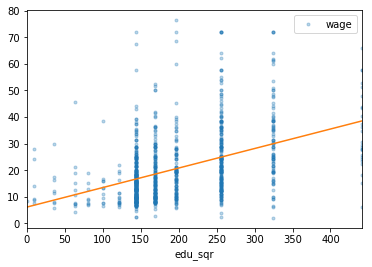

In [0]:
fig = plt.figure()
ax = plt.axes()
X = np.linspace(0,600,10000)
X = X.reshape(-1,1)

y = reg2.predict(X)
df.plot(y = 'wage', x = 'edu_sqr', style = '.', ax = ax, alpha = 0.3)
ax.plot(X, y)


We know that the marginal  effect of an extra year is the derivative of our wages estimation WRT education years. WIth the quadratic regression we estimate $WAGES = \alpha_1 + \alpha_2 \cdot EDU^2$
and thus,
${d(WAGES)\over d(EDU)} = 2\alpha_2 EDU$

In [0]:
deriv_quad = lambda ed: 2 * alpha2 * ed
deriv_quad(12), deriv_quad(14)

(1.7637374317546468, 2.0576936703804214)

For the LSR we have $WAGES = \beta_1 + \beta_2 \cdot EDU$
and thus,
${d(WAGES)\over d(EDU)} = \beta_2$

In [0]:
deriv = lambda ed: beta2
deriv(12), deriv(14)

(1.9802875875422308, 1.9802875875422308)

As we can see, because of the quadratic nature of the quadratic regression, the marginals increase as years increase which result in what we see above where the quadratic marginal at 12 years is less than that of the linear model but at 14 years it is the other way around.

##2.15F

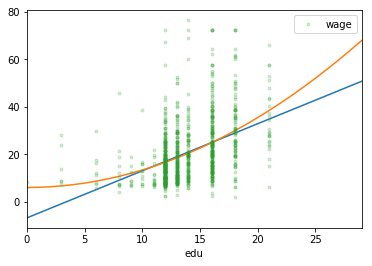

In [0]:
fig = plt.figure()
ax = plt.axes()

line = lambda ed: beta1 + beta2 * ed
quad = lambda ed: alpha1 + alpha2 * ed**2

X = range(0,30)
y1 = [line(x) for x in X]
y2 = [quad(x) for x in X]
ax.plot(X,y1)
ax.plot(X, y2)

df.plot(x = 'edu', y = 'wage', style = '.', alpha = .2, ax = ax)

The quadratic model seems to fit the data, however, the eye test might be misleading because it is difficult to identify large clusters at a particular value on the x axis.

##2.15.G

In [0]:
df['ln_wage'] = np.log(df.wage)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7792d90828>]],
      dtype=object)

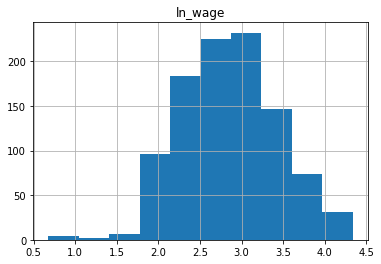

In [0]:
df.hist('ln_wage', bins = 10)

The log of wages certainly seems more normally distributed than wages

## 2.15.H

In [0]:
X = np.array(df.edu)
X = X.reshape(-1,1)
y = np.array(df.ln_wage)
reg3 = LinearRegression()
reg3.fit(X, y = y)
gamma1, gamma2 = reg3.intercept_, reg3.coef_[0]
gamma1, gamma2

(1.6094444661971297, 0.09040824708224358)

We have $$\log(WAGES)=\gamma_1+\gamma_2\cdot EDU$$
$$\Rightarrow WAGES= e^{\gamma_1}\cdot e^{\gamma_2}$$
$$\Rightarrow {d(WAGES)\over d(EDU)}=e^{\gamma_1}\cdot \gamma_2\cdot e^{\gamma_2 EDU}$$

In [0]:
log_deriv = lambda ed: np.e ** gamma1 * gamma2 * np.e**(gamma2*ed)
log_deriv(12),log_deriv(14)

(1.337662441797859, 1.6027808283979161)

The marginals of the log-linear model of course increase with increasing education, however, the marginals in question are less than there comparables for both the linear and the quadratic models.

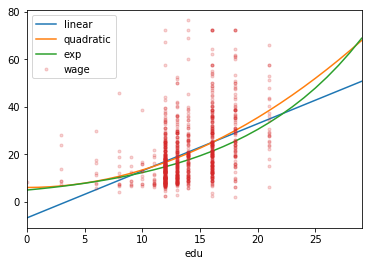

In [0]:
fig = plt.figure()
ax = plt.axes()

line = lambda ed: beta1 + beta2 * ed
quad = lambda ed: alpha1 + alpha2 * ed**2
log = lambda ed: np.e**(gamma1 + gamma2* ed)

X = range(0,30)
y1 = [line(x) for x in X]
y2 = [quad(x) for x in X]
y3 = [log(x) for x in X]
ax.plot(X,y1, label = 'linear')
ax.plot(X, y2, label = 'quadratic')
ax.plot(X, y3, label = 'exp')

df.plot(x = 'edu', y = 'wage', style = '.', alpha = .2, ax = ax)
ax.legend()